Enter the pickup coordinates (separated by space) : 
0 0
Enter coordinates (in meters) of delivery and ok when done: 
1 2
45 67
2 3
4 3
21 34
56 78
4 5
22 33
44 55
ok
Path:  [[0, 0], [1, 2], [2, 3], [4, 3], [4, 5], [22, 33], [21, 34], [44, 55], [45, 67], [56, 78]]
Distance:  101.09389582612367


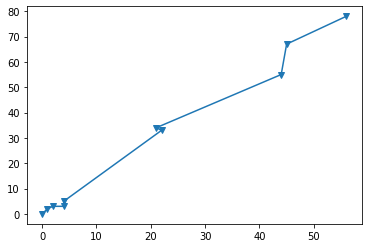

In [25]:
import math
import matplotlib.pyplot as plt
def distance(a,b,c,d):                             #Function to find distance between points (a,b) and (c,d)
    return math.sqrt((a-c)**2+(b-d)**2)

def pointsToGraph(delivpts,a,b):
    delivpts=[[a,b]]+delivpts
    graph=[]                                       # 2-D list to store distances between all pairs of points #Graph DS
    for i in range(0,len(delivpts)):
        graph.append([])
        for j in range(0,len(delivpts)):
            graph[i].append(distance(delivpts[i][0],delivpts[i][1],delivpts[j][0],delivpts[j][1]))
    return graph

#Brute Force Method #Does not work on values of n more than 8 to find best route as well as minimum possible distance
def permutation(lst):                         #Function to find all permutations of a given list
    if len(lst)<=1:
        return [lst]
    l=[]                                      #List to store all permutations  
    for i in range(len(lst)): 
        m=lst[i]                              #Extract lst[i] as m from the list
        remLst=lst[:i]+lst[i+1:]              #remLst is remaining list
        for p in permutation(remLst):         #Generating all permutations in which m is first element
            l.append([m]+p)
    return l
def bforce(delivpts,a,b):                         #Brute Force Function to check all routes
    distances=[]
    routes=permutation(delivpts)          #Exclude start point while taking permutations
    for i in range(len(routes)):              #Go through all permutations
        d=distance(routes[i][0][0],routes[i][0][1],a,b) #Distance between restaurant and first point of current permutation
        for j in range(len(routes[i])-1):
            d+=distance(routes[i][j][0],routes[i][j][1],routes[i][j+1][0],routes[i][j+1][1]) #Distance between consecutive
                                                                                             #points of current permutation
            if i>0 and d>min(distances):
                break
        distances.append(d)
    finalroute=[[a,b]]+routes[distances.index(min(distances))]
    mindist=min(distances)
    return finalroute,mindist

#Approximate method used for higher n values
def nearest(p,l):                           #Function to find point in list l which is at minimum distance from point p
    d=distance(p[0],p[1],l[0][0],l[0][1])   #Store the first distance
    np=l[0]                                 #Store the first point
    for i in range(0,len(l)):
        if d>distance(p[0],p[1],l[i][0],l[i][1]):
            d=distance(p[0],p[1],l[i][0],l[i][1])   #Store the nearest distance
            np=l[i]                         #Store the nearest point
    return np,d
def approxans(delivpts,a,b):                #Greedy Approach to go to nearest point which has not been visited at every step
    route=[[a,b]]
    npt,dist=list(nearest([a,b],delivpts))
    while len(delivpts)>1:
        del delivpts[delivpts.index(npt)]
        route.append(npt)
        npt,d=list(nearest(npt,delivpts))
        dist+=d
    route.append(delivpts[0])               #Add last remaining point to route
    return route,dist

def Optimization1(route,d):                     #Function that checks whether placing the last point as the second point causes
                                                #any improvement and return accordingly --> O(n)
    newroute=route[0:1]+route[-1:]+route[1:-1]
    newd=0
    for i in range(0,len(newroute)-1):
        newd+=distance(newroute[i][0],newroute[i][1],newroute[i+1][0],newroute[i+1][1])
        if newd>d:
            break
    if newd<=d:
        return newroute,newd
    return route,d

def Optimization2(route,d):                     #Function to pick up any random point (except last and second) and put it at
                                                #second position to check if it causes any improvement and return accordingly -->O(n^2)
    for i in range(3,len(route)-1):
        newroute=[route[0]]+[route[i]]+route[1:i]+route[i+1:]
        newd=0
        for j in range(0,len(newroute)-1):
            newd+=distance(newroute[j][0],newroute[j][1],newroute[j+1][0],newroute[j+1][1])
            if newd>d:
                break
        if newd<=d:
            route=list(newroute)
            d=newd
    return route,d

def Optimization3(route,d):                     #Function to swap every pair of points and check if it causes any improvement and
                                                #return accordingly --> O(n^3)
    for i in range(1,len(route)-1):
        for j in range(i+1,len(route)):
            newroute=route[:i]+route[j:j+1]+route[i+1:j]+route[i:i+1]+route[j+1:]
            newd=0
            for k in range(0,len(newroute)-1):
                newd+=distance(newroute[k][0],newroute[k][1],newroute[k+1][0],newroute[k+1][1])
                if newd>d:
                    break
            if newd<=d:
                route=list(newroute)
                d=newd
    return route,d

def Optimization(route,d,k):
    c=40000//k
    i=0
    while i<=c:
        route1,d1=list(Optimization1(route,d))
        if route1==route:
            break
        else:
            route=list(route1)
            d=d1
        i=i+1
    c=40000//(k**2)
    i=0
    while i<=c:
        route1,d1=list(Optimization2(route,d))
        route1,d1=list(Optimization1(route1,d1))
        if route1==route:
            break
        else:
            route=list(route1)
            d=d1
        i=i+1
    c=40000//(k**3)
    i=0
    while i<c:
        route1,d1=list(Optimization3(route,d))
        route1,d1=list(Optimization2(route1,d1))
        route1,d1=list(Optimization1(route1,d1))
        if route1==route:
            break
        else:
            route=list(route1)
            d=d1
        i=i+1
    return route,d

def angle(X,Y,a,b):
    x=X-a
    y=Y-b
    if x==0 and y>0:
        return math.pi/2
    if x==0 and y<0:
        return 3*math.pi/2
    if y==0 and x<0:
        return math.pi
    if y==0 and x>0:
        return 0
    if x>0 and y>0:
        return math.atan(y/x)
    if x<0 and y>0:
        return math.pi+math.atan(y/x)
    if x<0 and y<0:
        return math.pi+math.atan(y/x)
    if x>0 and y<0:
        return 2*math.pi+math.atan(y/x)
    return 0
# Approximate method using mergesort on polar coordinates by taking start point as origin
def merge(l,r,dell,delr,px,py):
    i=0
    j=0
    x=[]
    delp=[]
    while i<len(l) or j<len(r):
        if i<len(l) and j<len(r):
            if l[i]<r[j]:
                x.append(l[i])
                delp.append(dell[i])
                i=i+1
            elif l[i]>r[j]:
                x.append(r[j])
                delp.append(delr[j])
                j=j+1
            elif l[i]==r[j]:
                pp=[px,py]
                if delp!=[]:
                    pp=delp[len(delp)-1]
                if distance(pp[0],pp[1],dell[i][0],dell[i][1])<=distance(pp[0],pp[1],delr[j][0],delr[j][1]):
                    x.append(l[i])
                    delp.append(dell[i])
                    i=i+1
                else:
                    x.append(r[j])
                    delp.append(delr[j])
                    j=j+1
        elif i>=len(l) and j<len(r):
            x.append(r[j])
            delp.append(delr[j])
            j=j+1
        elif i<len(l) and j>=len(r):
            x.append(l[i])
            delp.append(dell[i])
            i=i+1
    return x,delp
def mergesort(a,delivpts,px,py):
    ln=len(a)
    if ln>1:
        q=ln//2
        l=a[:q]
        r=a[q:]
        dell=delivpts[:q]
        delr=delivpts[q:]
        temp=mergesort(l,dell,px,py)
        l=temp[0]
        dell=temp[1]
        temp=mergesort(r,delr,px,py)
        r=temp[0]
        delr=temp[1]
        temp=merge(l,r,dell,delr,px,py)
        a=temp[0]
        delivpts=temp[1]
    return a,delivpts

def aprroxbyangle(delivpts,a,b):
    angles=[]
    for i in delivpts:
        angles.append(angle(i[0],i[1],a,b))
    return mergesort(angles,delivpts,a,b)[1]

def ShortestPath(delivpts,a,b,k):
    if k<9:
        return bforce(delivpts,a,b)
    else:
        route,d=list(approxans(list(delivpts),a,b))
        route,d=list(Optimization(route,d,k))
        route1=[[a,b]]+list(aprroxbyangle(list(delivpts),a,b))
        route2=route1[0:1]+route1[-1:0:-1]
        d2=0
        d1=0
        d1=distance(route1[0][0],route1[0][1],a,b) #Distance between restaurant and first point
        d2=distance(route2[0][0],route2[0][1],a,b)
        for i in range(k-1):
            d1+=distance(route1[i][0],route1[i][1],route1[i+1][0],route1[i+1][1])
            d2+=distance(route2[i][0],route2[i][1],route2[i+1][0],route2[i+1][1])
        route1,d1=list(Optimization(route1,d1,k))
        route2,d2=list(Optimization(route2,d2,k))
        if d>d1 and d2>d1:
            return route1,d1
        if d2>d and d1>d:
            return route,d
        return route2,d2

delivpts=[]   #List to store order delivery coordinates         #(input)
print("Enter the pickup coordinates (separated by space) : ")
a,b=map(int,input().split())
print("Enter coordinates (in meters) of delivery and ok when done: ")
while True:
    temp1=input()
    if temp1=="OK" or temp1=="Ok" or temp1=="ok" or temp1=="oK":
        break
    temp1,temp2=map(int,temp1.split())
    delivpts.append([temp1,temp2])

#Sample inputs
#a,b=0,0
#delivpts=[[0.5,1],[3,3],[2,3]]
#delivpts=[[3,3],[2,3],[0.5,1],[11,13],[11,14],[11,15],[11,16],[11,17],[11,18]]
#delivpts=[[0.5,1],[3,3],[1,1],[2,2]]
#delivpts=[[0.5,1],[3,0],[1,4],[4,4],[2,1]]
#End of Sample inputs

delivptscpy=[i for i in delivpts]         #Create copy of original delivery coordinates (can be used if order details also need to be displayed
i=0
while i<len(delivpts)-1:                  #Delete repeated delivery coordinates to optimize the algorithms reducing n value and hence
                                          #reduce the time consumed                 
    j=i+1
    while j<len(delivpts):
        if delivpts[i]==delivpts[j]:
            del delivpts[i]
            i=i-1
            continue
        j=j+1
    i=i+1
n=len(delivpts)
finalr,finaldis=list(ShortestPath(delivpts,a,b,n))
x=[i[0] for i in finalr]
y=[i[1] for i in finalr]
#plt.plot(finalr, marker="v", c='r', ls="-", label="path")
plt.plot(x,y,marker='v')
#plt.scatter(x,y,marker='o')
#plt.plot(x, y, marker='v', color='gray', markersize=15, linewidth=4, markerfacecolor='white', markeredgecolor='gray',
         #markeredgewidth=2)
print("Path: ",finalr)
print("Distance: ",finaldis)

